# KNN and Decision Tree models

In [2]:
# load packages
import pandas as pd
import matplotlib.pyplot as plt
import random

In [3]:
# read dataframe

from datetime import datetime
import os

# this should be the last date!!!
files = sorted([f for f in os.listdir("data") if (f.endswith(".csv") and (f.startswith("preprocessed_2")))], reverse=True)
latest = files[0]
df = pd.read_csv(f"data/{latest}")

# drop new generated index column
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,Survived,Pclass,SibSp,Parch,Age_true,AgeGroup,FareGroup,CabinLvl,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Mr,Title_Mrs,Title_Ms,Title_Noble
0,0,3,1,0,1,2,0,0,0,0,1,0,1,0,0,0
1,1,1,1,0,1,4,4,5,1,0,0,0,0,1,0,0
2,1,3,0,0,1,3,1,0,0,0,1,0,0,0,1,0
3,1,1,1,0,1,4,4,5,0,0,1,0,0,1,0,0
4,0,3,0,0,1,4,1,0,0,0,1,0,1,0,0,0


In [4]:
# import relevant packages for modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

# define target variable and drop it in the training set
y = df["Survived"]
X = df.drop("Survived", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)


### KNN

In [61]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import random

# Set seed to get always same results
random.seed(10)

# create an estimator
knn = KNeighborsClassifier()

# specify the parameter grid
parameters = {
    'n_neighbors': range(1, 21),
    #'p': range(1,5),
    'weights': ['uniform', 'distance'],
    'metric': ['cityblock', 'euclidean', 'l1', 'l2', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    #'leaf_size': range(10,61)

}

# specify the cross validation
stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# create the grid search instance
grid_search_estimator = GridSearchCV(knn, parameters, scoring='accuracy', cv=stratified_10_fold_cv, return_train_score=False, error_score = 'raise')

# run the grid search
grid_search_estimator.fit(X_train,y_train)

# print the results of all hyper-parameter combinations
results = pd.DataFrame(grid_search_estimator.cv_results_)
display(results)
    
# print the best parameter setting
print("best score is {} with params {}".format(grid_search_estimator.best_score_, grid_search_estimator.best_params_))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_metric,param_n_neighbors,param_weights,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007738,0.003291,0.009889,0.003455,auto,cityblock,1,uniform,"{'algorithm': 'auto', 'metric': 'cityblock', '...",0.777778,...,0.741935,0.725806,0.758065,0.741935,0.677419,0.758065,0.774194,0.744726,0.030396,773
1,0.005627,0.003628,0.005409,0.004775,auto,cityblock,1,distance,"{'algorithm': 'auto', 'metric': 'cityblock', '...",0.777778,...,0.741935,0.725806,0.758065,0.741935,0.677419,0.758065,0.774194,0.744726,0.030396,773
2,0.006976,0.003108,0.008051,0.002098,auto,cityblock,2,uniform,"{'algorithm': 'auto', 'metric': 'cityblock', '...",0.793651,...,0.774194,0.806452,0.790323,0.758065,0.709677,0.677419,0.758065,0.757578,0.037297,741
3,0.006956,0.004837,0.006765,0.003959,auto,cityblock,2,distance,"{'algorithm': 'auto', 'metric': 'cityblock', '...",0.825397,...,0.822581,0.741935,0.790323,0.790323,0.693548,0.709677,0.774194,0.773528,0.042359,719
4,0.007320,0.004242,0.010258,0.005692,auto,cityblock,3,uniform,"{'algorithm': 'auto', 'metric': 'cityblock', '...",0.857143,...,0.838710,0.822581,0.806452,0.741935,0.774194,0.790323,0.822581,0.808884,0.033031,401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.004453,0.004337,0.007014,0.003209,brute,manhattan,18,distance,"{'algorithm': 'brute', 'metric': 'manhattan', ...",0.888889,...,0.838710,0.790323,0.822581,0.822581,0.822581,0.725806,0.854839,0.823297,0.047437,149
796,0.005619,0.006951,0.011084,0.008160,brute,manhattan,19,uniform,"{'algorithm': 'brute', 'metric': 'manhattan', ...",0.888889,...,0.854839,0.758065,0.806452,0.854839,0.774194,0.709677,0.822581,0.812033,0.054247,328
797,0.005328,0.003691,0.005051,0.004285,brute,manhattan,19,distance,"{'algorithm': 'brute', 'metric': 'manhattan', ...",0.904762,...,0.854839,0.790323,0.822581,0.854839,0.838710,0.741935,0.854839,0.836124,0.045181,4
798,0.004199,0.004193,0.007751,0.002488,brute,manhattan,20,uniform,"{'algorithm': 'brute', 'metric': 'manhattan', ...",0.873016,...,0.822581,0.741935,0.822581,0.822581,0.790323,0.693548,0.838710,0.799258,0.050247,586


best score is 0.8361751152073733 with params {'algorithm': 'brute', 'metric': 'cityblock', 'n_neighbors': 16, 'weights': 'distance'}


Scoring = Accuracy  
best score is 0.8361751152073733 with params {'algorithm': 'brute', 'metric': 'cityblock', 'n_neighbors': 16, 'weights': 'distance'}


In [5]:
random.seed(10)
knn = KNeighborsClassifier(n_neighbors=16, algorithm= 'brute', metric='cityblock',  weights='distance')
knn.fit(X_train, y_train)

# Get the predicitions
y_pred = knn.predict(X_test) 

In [6]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       157
           1       0.76      0.74      0.75       111

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268



In [7]:
print(accuracy_score(y_test, y_pred))

0.7947761194029851


We don't need to scale our data because we have only categorical values and no numerical after the preprocessing.

### Decision Trees

Hyper-Parameter Tuning with Grid Search

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

random.seed(10)

# create an estimator
dt = DecisionTreeClassifier()

# specify the parameter grid
parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': range(2,11),
    'min_samples_leaf': range(1,11),
    'max_features': range(1,16)
}

# specify the cross validation
stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# create the grid search instance
grid_search_estimator = GridSearchCV(dt, parameters, scoring='accuracy', cv=stratified_10_fold_cv, return_train_score=False, error_score = 'raise')

# run the grid search
grid_search_estimator.fit(X_train,y_train)

# print the results of all hyper-parameter combinations
results = pd.DataFrame(grid_search_estimator.cv_results_)
display(results)
    
# print the best parameter setting
print("best score is {} with params {}".format(grid_search_estimator.best_score_, grid_search_estimator.best_params_))

KeyboardInterrupt: 

In [51]:
# Apply model from grid search
random.seed(10)
dt = DecisionTreeClassifier(criterion='gini', max_features = 8, min_samples_leaf = 3, min_samples_split = 10, random_state = 1000)
dt.fit(X_train, y_train)

# Get the predicitions
y_pred = dt.predict(X_test) 


In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       157
           1       0.82      0.73      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



In [47]:
print(accuracy_score(y_test, y_pred))

0.8208955223880597


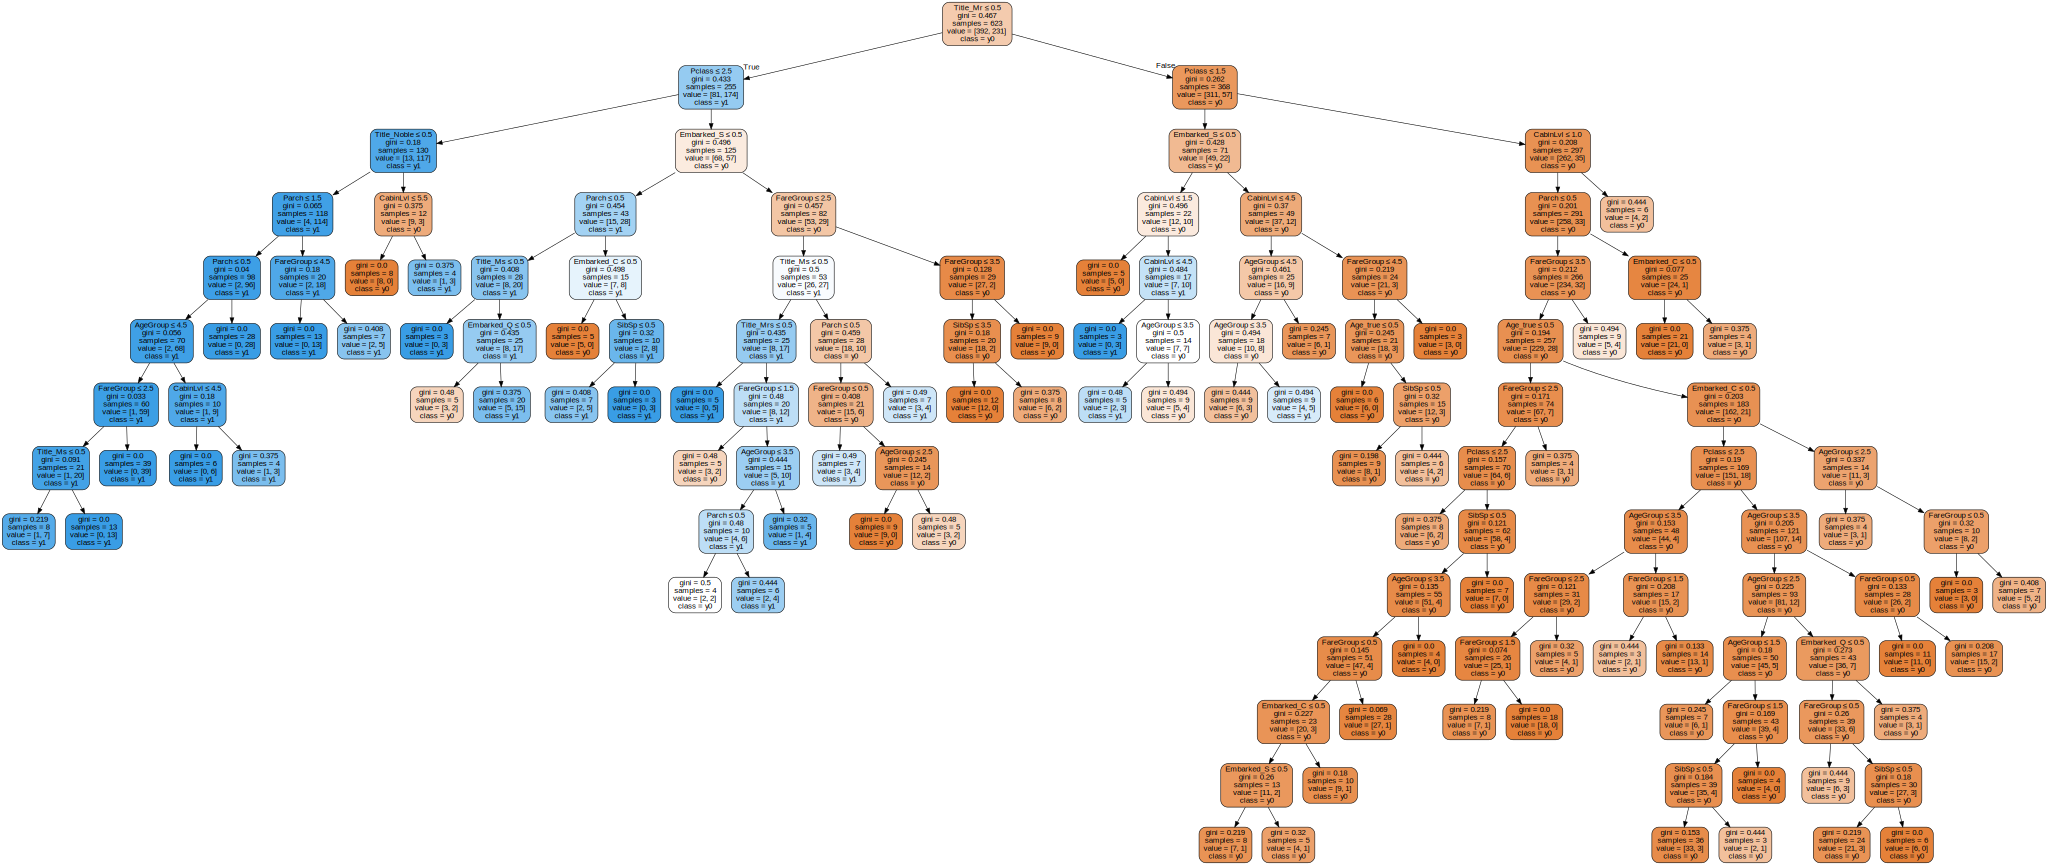

In [48]:
# Visualize the tree

import os
os.environ['PATH'] += ';C:\\Program Files (x86)\\Graphviz2.38\\bin'

import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=X_train.columns, 
                                class_names= True,
                               filled=True, rounded=True, special_characters=True) 

graph = graphviz.Source(dot_data) 

display(graph)


